Zadanie 1 

In [2]:
import numpy as np
import cv2
from PIL import Image
import IPython.display as display
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from math import sqrt

In [3]:
fv = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
fh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [4]:
fv.shape[0]//2

1

In [5]:
kernel= fv.shape[0]//2

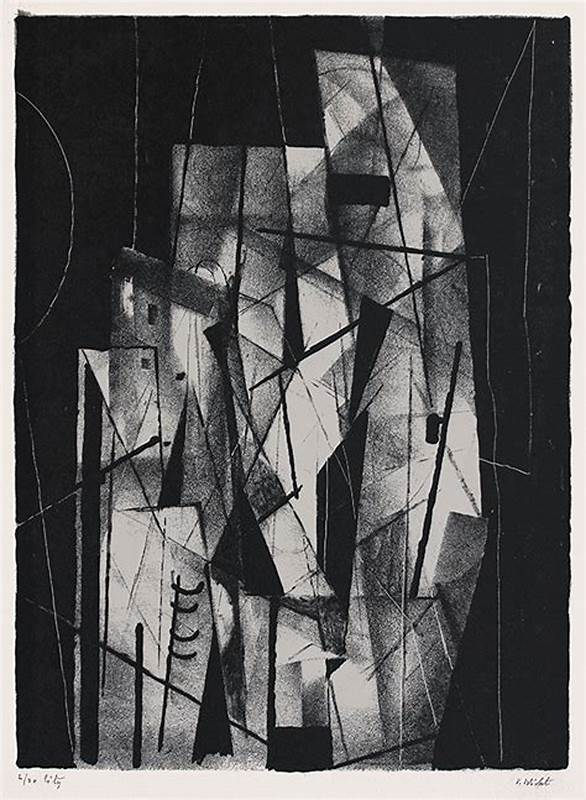

In [6]:
im = Image.open('C:\\Users\\Maryla\\Desktop\\mashine_lerning\\gray.jpg')
display.Image('C:\\Users\\Maryla\\Desktop\\mashine_lerning\\gray.jpg',width="250", height="300")

In [7]:
im.size

(586, 800)

In [8]:
image = np.dot(im, [1, 1, 1])//3 

In [9]:
zero = np.zeros(image.shape)

In [10]:
for i in range(kernel, image.shape[0] - kernel):
            for j in range(kernel, image.shape[1] - kernel):
                x = image[i - kernel: i + kernel + 1, j - kernel: j + kernel + 1]
                x = x.flatten() * fv.flatten()
                sum_x = x.sum()

                y = image[i - kernel: i + kernel + 1, j - kernel: j + kernel + 1]
                y = y.flatten() * fh.flatten()
                sum_y = y.sum()

                zero[i - kernel][j - kernel] = sqrt(sum_x**2 + sum_y**2)


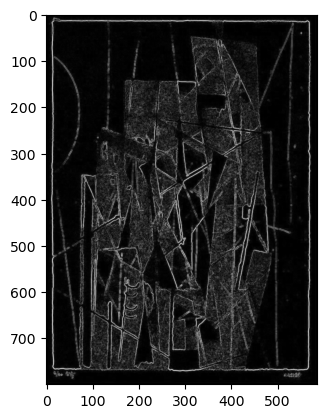

In [11]:
plt.imshow(zero, cmap= 'gray')
plt.show()

Zadanie 2 

Przy normalnej NN liczbę parametrów liczy się: inputxautput + bias. Jako że to jest sieć konwolucyjna to inputem będzie liczba kanałów (Nk) a aotputem liczba filtrów(Nf)xwielkośc filtru(Sf), a liczba bias'ów jest równa liczbie filtrów w warstwie. Oprócz tego każdy filter w domyśle ma jeden bias stąd: 

(NkxNfxSf+1)xNf == NfxNkxSf+Nf, gdzie Nf == liczbie kanałów wyjściowyc 

Zadanie 3

W tym wzorem obliczamy jak zmieni się szerokośc i wysokość obrazu wyjściowego w stosunku do obrazu wejsciowego. Można to też zapisać bez rodzielania tego na wysokosć i szerokośc uwzględniając po prostu wymiar czyli illoczyn wysokości i szerokości. Mamy wtedy: 

    (Di-Do -2p/s) + 1
   gdzie, Di/Do - Wymiar inptu/outputu 

Zadanie 4

In [50]:
def im_interp(im, H,W):
    X = np.zeros(shape=(W,H))
    h,w = im.shape
    x = np.arange(0,w+1,1) * W/w 
    y = np.arange(0,h+1,1) * H/h 
    for i,v in enumerate(X):
        yl_i = np.argmax(y >i) - 1
        for j,_ in enumerate(v):
        
            xl_i = np.argmax(x > j) - 1
            xr_i = np.argmax(j < x) 
            xl = x[xl_i]
            xr = x[xr_i]
            yl = im[yl_i, xl_i - 1]
            yr = im[yl_i, xr_i - 1]

            X[i,j] = yl+(yr-yl) / (xl - xr)*j-xl
            
    return X

In [51]:
def resize(im,H,W):
    im_new = im_interp(im, H,W)
    X = im_interp(im_new, H,W)
    return im_new, X

In [52]:
resize(image, 100, 100)

(array([[   247.        ,    206.56675768,    263.56286689, ...,
           -424.34832765,    144.04778157,    143.02389078],
        [   238.        ,    205.70675768,    333.88286689, ...,
          -1005.76832765,   1280.60778157,    134.02389078],
        [   238.        ,    229.14675768,    438.64286689, ...,
         -69925.58832765,   3586.72778157,    134.02389078],
        ...,
        [   236.        ,    229.14675768,    173.24286689, ...,
          -2141.60832765,    135.04778157,    133.02389078],
        [   238.        ,    229.14675768,    230.12286689, ...,
          -4419.28832765,   -440.23221843,    133.02389078],
        [   233.        ,    197.84675768,    226.12286689, ...,
           -434.34832765,    134.04778157,    133.02389078]]),
 array([[ 1.43023891e+02,  2.86433242e+02,  9.05745392e+01, ...,
          5.52841530e+04, -5.62251670e+04,  1.46412969e+02],
        [ 1.34023891e+02,  2.69293242e+02, -5.26454608e+01, ...,
          5.38132969e+02, -2.25168627e